# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# Create a dataframe called 'df' from the 'ab_data.csv' file
df = pd.read_csv('ab_data.csv')

In [3]:
# View the first three rows and column names
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
# Use 'df.shape' to see how many rows and columns exist in the dataframe

df.shape

(294478, 5)

**c.** The number of unique users in the dataset.


In [5]:
# Get a count of unique values in the 'user_id' column using 'df.nunique'
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [6]:
# Use value counts divided by the number of rows to determine the proportion of users converted
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
# Query the dataframe to answer question e. Also create a dataframe called 'mismatch'
# from the results of the query.
mismatch = df.query("(group == 'treatment') and (landing_page != 'new_page')")
mismatch.shape[0]

1965

**f.** Do any of the rows have missing values?

In [8]:
# get a sum of all the null values in the original dataframe 'df'
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
# get a sum of all the null values in the dataframe 'mismatch'
mismatch.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

# Create a condition where 'control' does not match 'old_page'
mismatch_control = (df['group'] == 'control') & (df['landing_page'] != 'old_page')

# Create a condition where 'treatment does not match 'new_page'
mismatch_treatment = (df['group'] == 'treatment') & (df['landing_page'] != 'new_page')

# Create a dataframe 'df2', that removes rows where the two conditions above are true
df2 = df.drop(df[mismatch_control | mismatch_treatment].index)

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df2.value_counts().sum()

290585

In [13]:
ca_converted_count = df_merged['CA'].value_counts()[1]
uk_converted_count = df_merged['UK'].value_counts()[1]
us_converted_count = df_merged['US'].value_counts()[1]
ca_converted_count, uk_converted_count, us_converted_count

NameError: name 'df_merged' is not defined

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [14]:
# See the number of rows in 'df2'
df2.shape[0]

290585

In [15]:
# See the number of unique 'user_id' values
df2.user_id.nunique() # this is one less than the total rows in df2

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [16]:
# Display the duplicated 'user_id' value and their indeces
df2[df2['user_id'].duplicated(keep = False)].user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [17]:
dup_user_id = df2[df2['user_id'].duplicated(keep = False)]
dup_user_id

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [18]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case,
# because the rows with duplicate user_id are not entirely identical. 
first_dup_index = df2[df2['user_id'].duplicated(keep='first')].index
df2 = df2.drop(first_dup_index)

# Check again if the row with a duplicate user_id is deleted or not
df2['user_id'].duplicated().sum()

0

In [19]:
df2.duplicated().sum()

0

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [20]:
# Calculate the sum of all 'converted' by the total number of rows 
df2['converted'].sum()/df2.shape[0]

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
# Create a df 'df_control' filtered by those marked 'control' in the 'group' column
df_control = df2[df2['group'] == 'control']

# Get a count of total rows in the 'group' column from df_control created above
control_count = df_control['converted'].count()

# Get the sum of all values in the 'group' column of df_control
control_converted_count = df_control['converted'].sum()

# Calculate sum of 'converted' divided by total number in the 'group' column
control_converted_prob = control_converted_count/control_count

# Display the calculated figure
control_converted_prob

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
# Create a df 'df_treatment' consisting of only those marked 'treatment' in the 'group' column
df_treatment = df2[df2['group'] == 'treatment']

# Get a count of total rows in the 'group' column from df_treatment created above
treatment_count = df_treatment['converted'].count()

# Get the sum of all values in the 'group' column of df_treatment
treatment_converted_count = df_treatment['converted'].sum()

# Calculate sum of 'converted' divided by the total number in the 'group' column
treatment_converted_prob = treatment_converted_count/treatment_count

# Display the calculated figure
treatment_converted_prob

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [23]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.

obs_diff = treatment_converted_prob - control_converted_prob
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [24]:
# Create a variable for how many rows have the 'landing_page' marked as 'new_page'
new_page_hits = df2.query("landing_page == 'new_page'").shape[0]

# Create a variable for total rows 'landing_page' has
total_page_hits = df2['landing_page'].shape[0]

# Calculate how many users received 'new_page' divided by total users
new_page_prob = new_page_hits/total_page_hits

# Display the calculated figure
new_page_prob

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.


>
>**The observed difference in conversion rates between the control and treatment groups was only 0.157%, in favor of the old page. This does not provide evidence to conclude that the old page should be replaced by the new page.** 



<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.



>**Null Hypothesis:**  $H_0:$ $p_{old}$ $\geq$ $p_{new}$
>
>**The null hypothesis is that the "converted" probability (or rate) for the old page ($p_{old}$) is equal to or greater than the "converted" probability for the new page ($p_{new}$). In other words, the old page is as good as or better than the new page in terms of conversion rate.**
>
>
>**Alternative Hypothesis:**  $H_1: p_{new} > p_{old}$ 
>
>**The alternative hypothesis is that the "converted" probability for the new page ($p_{new}$) is definitely better (i.e., greater) than the "converted" probability for the old page ($p_{old}$). This indicates that the new page has a significantly higher conversion rate compared to the old page.**




### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [25]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [26]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [27]:
# Get a count of users from df_treatment (from section 1.4)
# Recall that df_treatment consists only those marked 'treatment' in the 'group' column 
n_new = df_treatment.group.count()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [28]:
# Get a count of users from df_control (from section 1.4)
# Recall that df_control consists only those marked 'control' in the 'group' column 
n_old = df_control.group.count()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [29]:
# Simulate a Sample for the treatment Group
# Use np.random choice with the arguments set as 0 and 1 as possible choices, 
# the size set to the value of n_new (count of users in the 'treatment' group
# use the p_new value to set the 'odds'
new_page_converted = np.random.choice([0, 1], size = n_new, p = [1 - p_new, p_new])
new_page_converted.mean()

0.12056981625490332

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [30]:
# Simulate a Sample for the control Group
# Use np.random choice with the arguments set as 0 and 1 as possible choices, 
# the size set to the value of n_old (count of users in the 'contol' group
# use the p_old to set the 'odds'
old_page_converted = np.random.choice([0, 1], size = n_old, p = [1 - p_old, p_old])
old_page_converted.mean()

0.12006966146729628

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [31]:
# Subtract the mean of old_page_converted from new_page_converted to find the difference
prob_obs_diff = new_page_converted.mean() - old_page_converted.mean()
prob_obs_diff

0.0005001547876070378


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [32]:
# Sampling distribution 
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [1 - p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [1 - p_old, p_old])
    
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

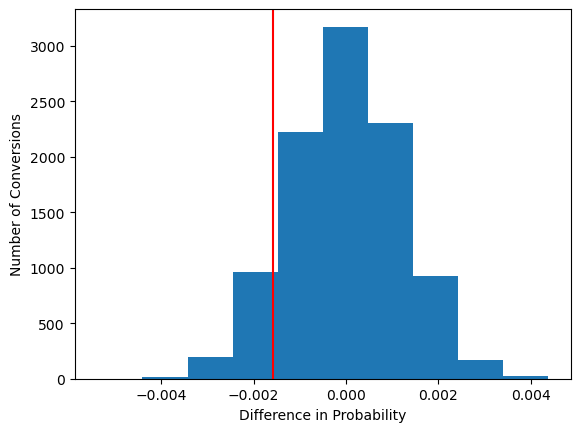

In [33]:
# Create and display the graph
plt.hist(p_diffs);
plt.xlabel('Difference in Probability')
plt.ylabel('Number of Conversions')
plt.axvline(x = obs_diff, color = 'red')
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [34]:
# Find the mean of 'p_diffs' that are greater than 'obs_diff' (actual difference
# obs_diff =  treatment_converted_prob - control_converted_prob 
prop_greater = (p_diffs > obs_diff).mean()
prop_greater

0.8996

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 


>
>**We have just calculated the 'p-value'. In statistical analysis, we rely on p-values to make decisions about whether to accept or reject the null hypothesis. These values range from 0, indicating rejection of the null hypothesis, to 1, indicating acceptance of it. Typically, we seek a p-value less than or equal to 0.05 to reject the null hypothesis. In our examination of ab_data.csv, we compared the observed difference to the distribution of mean differences represented by p_diffs, resulting in a p-value greater than .05. With this p-value, our random sampling did not provide sufficient evidence to reject the null hypothesis. This study has indicated that there is no statistical basis to conclude that the new_page outperforms the old_page.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [35]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)].shape[0]             

# number of conversions with the new_page
convert_new = df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)].shape[0]

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]

# number of individuals who received new_page
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


**m.** Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>**P-values and z-scores are related in the context of hypothesis testing, specifically when you are dealing with a normally distributed population or sample.**
>
>**A z-score is a measure of how many standard deviations a data point is from the mean of a normal distribution. It quantifies how extreme or unusual a particular data point is within the context of a normal distribution. In a normal distribution, approximately 95% of the data points are typically found within a range of plus or minus 2 standard deviations from the population mean. Our z-score comfortably falls within this range, indicating that it falls within a 95% confidence interval. Therefore, we can reasonably conclude that this difference is not statistically significant.**
>
>**A p-value is a probability value that quantifies the likelihood of observing results as extreme as, or more extreme than, the ones obtained in a statistical test, assuming that the null hypothesis is true. Since our calculated p-value is more than .05 (our alpha), this suggests that the observed statistic is not statistically significant. Therefore, we fail to reject the hypothesis, and mainain the use of our old_page.**
>
>**The relationship between the z-score and p-value is essentially about assessing the statistical significance of a z-score. A smaller p-value indicates that the observed z-score is farther from the mean and is therefore more extreme, which suggests stronger evidence against the null hypothesis.**
>
>
>
>**The results of the our calculations are consistent to our findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**We will use logistic regression, which is used for binary classifications, such as predicting yes or no, pass or fail, or whether to adopt a new website or not, such is the case here.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [37]:
# Create the intercept column
df2['intercept'] = 1

# Create dummies for the group column, set the values to '1' for 'treatment' and '0' for 'control'
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment'].astype(int)

# Check if we columns were created successfully
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [38]:
model_1 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
model_1_results = model_1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
model_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Sep 2023   Pseudo R-squ.:               8.077e-06
Time:                        14:28:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [40]:
p_values = model_1_results.pvalues
p_values

intercept    0.000000
ab_page      0.189886
dtype: float64

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).



>
>**We have different p-values in Part II vs Part III because we are asking different questions. In Part II, we asked if $p_{new}$ is greater than or equal to $p_{old}$ (is "converted" probability for the new page greater than or equal to the "converted" probability for the old page). This would be a one-sided test, as the alternative hypothesis specifies a specific direction of an effect, difference, or relationship. It can be either a greater-than (>) or less-than (<) statement.**
>
>**The null and alternative hypothesis for Part III**
>
>$H_0:$ $\beta_{1}$ = 0    
>
>$H_1:$ $\beta_{1}$ $\neq$ 0    
>
>**or alternatively:**
>
>$H_0:$  $p_{new}$ -  $p_{old}$  =  0
>
>
>$H_0:$  $p_{new}$ -  $p_{old}$  =  0
>
>**Part III poses a different question using regression testing. We are not determining if the new page offers higher conversion rates, but more precisely we are asking if the new page offers a **different** conversion rate. This could be either greater or less probabilty of conversion. This would be a two-sided test, as the results of our experiment could fall above or below the mean.**
>
>**The difference in our p-values from Part II and Part III is due to using different methods of calculations. Nevertheless, these p-values fail to meet our Type 1 error threshold of .05 ( the alpha), indicating a  confidence level of less than 95%. Therefore both tests suggests that we should fail to reject the null hypothesis.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


>
>**Many factors could potentially impact users' conversion rates. Variables such as location, age, gender, or prior experience with the old page could be considered. Furthermore, users in the treatment group who are used to the old page may feel aversion to change which could, which could influence their decision. Exploring these factors can provide fresh insights but also introduce analytical complexities. While we've obtained straightforward results when analyzing conversion rates of new page vs. old page, our analysis becomes more complicated as additional factors are introduced. Logistic regression assumes linear relationships, which may not hold for all factors. Some of these factors may also exhibit multicollinearity, meaning they are not fully independent and may influence both each other and our variable of interest.**
>

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [41]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
# Join with the df2 dataframe
df_merged = pd.merge(df2, df_countries)
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [43]:
# Create the necessary dummy variables
df_dummies = pd.get_dummies(df_merged['country']).astype(int)
df_dummies.head()

,CA,UK,US
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [44]:
df_merged = df_merged.join(df_dummies)
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [45]:
# Conversion rates for each country
us_converted_mean = df_merged[df_merged['country'] == 'US']['converted'].mean()
uk_converted_mean = df_merged[df_merged['country'] == 'UK']['converted'].mean()
ca_converted_mean = df_merged[df_merged['country'] == 'CA']['converted'].mean()
us_converted_mean, uk_converted_mean, ca_converted_mean

(0.1195468006423762, 0.12059448568984076, 0.11531829781364232)

In [46]:
intercept = 1
model_2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page','UK', 'CA']])
model_2_results = model_2.fit()
model_2_results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Sep 2023   Pseudo R-squ.:               2.323e-05
Time:                        14:29:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

>
>
>**The conversion rate for each country is similar to the combined conversion rate calculated in 1d, with all figures close to .12, which is practically insignificant. After creating the model above, we can see the p-values are all greater than the alpha of .05, indicating that there is no statistical evidence that the country has any statistically significant impact on conversion rates.**



**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [47]:
# Create the new columns to be used for further comparison.
df_merged['us_page'] = df_merged['ab_page'] * df_merged['US']
df_merged['ca_page'] = df_merged['ab_page'] * df_merged['CA']
df_merged['uk_page'] = df_merged['ab_page'] * df_merged['UK']

#Check to see if columns were created successfully
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,us_page,ca_page,uk_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [48]:
# Fit your model, and summarize the results
# 'US' will be the reference [the baseline to which 'CA' and 'UK' (the predictor variables) are compared].
model_3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'CA', 'UK', 'ca_page', 'uk_page']])
model_3_results = model_3.fit()
model_3_results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Sep 2023   Pseudo R-squ.:               3.482e-05
Time:                        14:29:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ca_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
uk_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

## Conclusions ##
>
>
>**The probability test, A/B test, and regression tests performed above all gave similar results. In every case, the p-values remained over the alpha  of .05, with no test indicating that our results are statistically significant at a 95% confidence level. The tests show that the 'treatment' group (new_page) did not perform any better than the 'control' group, therefore we will fail to reject the null hypothesis, and continue to use the old landing page.**
>
>**From a practical standpoint, we can come to the same conclusion that the new page is no more successful than the old page. If we look at the summaries from each of our tests, we can see that the new page is least effective in Canada, while the new page performed marginally better in the UK. However, the difference is tiny, and could be attributed to the smaller sample size, with Canada having a significantly smaller sample than the UK and the US. The same is true with our probablility and A/B test, with both showing that the new page and old page performed almost equally. As a result, we have seen to reason to change our landing page, and we fail to reject the null hypothesis.** 


### References ###
>
>https://www.statology.org/pandas-multiply-two-columns/
>
>I used this website to learn how to multiply columns, which were used in the logistic regression model in section 3h (when created columns 'ca_page', 'uk_page', 'us_page').
>
>https://www.statsmodels.org/stable/index.html
>
>I used this documentation for statsmodel for help with the regression models of section 3.
>
>https://blog.devgenius.io/sampling-distribution-of-samples-means-using-python-14da802d3168
>
>https://notebook.community/alexandrnikitin/algorithm-sandbox/courses/DAT256x/Module04/04-05-Sampling%20Distributions
>
>I used these websites for help with sampling distributions. This was an excellent supplement to the course materials.


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])